In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
font = {'size'   : 12}
plt.rc('font', **font)

# For animation
%matplotlib inline
import time
import pylab as pl
from IPython import display
from IPython.display import clear_output

### Potential energy function
$$
V(x) = (x^2 - 1)^2 \, .
$$

### Probability density function
$$
p(x) = \frac{ e ^{-\beta V(x)}}{\int_\mathbb{R} e ^{-\beta V(x)}\, \mathrm{d}x'} \, .
$$

### Cumulative density function
$$
F_X(x) = P(X\leq x) 
= \int_{-\infty}^x p(x')\, \mathrm{d}x' \, .
$$

### Inverse of cumulative density function (strictly increasing)
$$
F^{-1}_X(y)\,=
\left\{ x\in \mathbb{R} : F_X(x) = y \right\}, \, \mathrm{with}\, y \in [0,1] \,.
$$

### Quantile function (generalized inverse function):
$$
F^{-1}_X(y)\,=\,\inf\left\{ x\in \mathbb{R} : F_X(x) \ge y \right\}, \, \mathrm{with}\, y \in [0,1] \,.
$$

In [2]:
# x-Grid
xmin  = -3
xmax  = - xmin
xbins = 400
xedges = np.linspace(xmin,xmax,xbins)
dx = xedges[1] - xedges[0]
xcenters = xedges + 0.5* dx
xcenters = np.delete(xcenters,-1)
xbins = len(xcenters)

# y-Grid
ymin  = 0
ymax  = 1
ybins = 500
yedges = np.linspace(ymin, ymax, ybins)
dy = yedges[1] - yedges[0]
ycenters = yedges + 0.5* dy
ycenters = np.delete(ycenters, -1)
yb0ins = len(ycenters)


beta = 2.9
def V(x):
    return ( x**2 - 1 )**2

def pdf(x):
    return np.exp( - beta * V(x) ) / np.sum( np.exp( - beta * V(x) ) * dx )

# Cumulative sum to approximate the CDF
def cdf(x):
    y = np.cumsum([ dx * pdf(xcenters) ])
    return y

# Quantile function or generalized inverse of cumulative distribution function
def qf(y):
    #Estimate the cdf
    FX = cdf(xcenters)
    
    #Array where to store the values of x
    x = np.zeros(len(y))
    
    # For each value in y, estimate the quantile:
    # Search the values of the CDF greater than y
    # The first value will be x
    for i in range(len(y)):
        # It is necessary to set a tolerance because FX[-1] is not exactly 1
        tol = 1e-10
        idx = FX >= (y[i] - tol)
        x[i] = xcenters[idx][0]
        
    return x

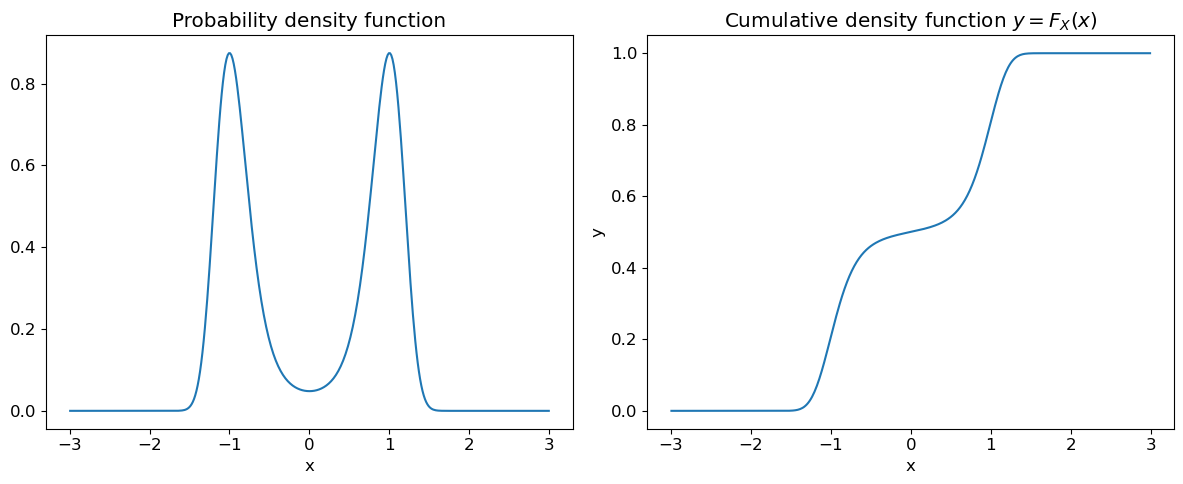

In [3]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12, 5))
ax0.plot(xcenters,pdf(xcenters))
ax0.set_xlabel('x')
ax0.set_title('Probability density function')

ax1.plot(xcenters,cdf(xedges),'-')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.set_title(r'Cumulative density function $y = F_X(x)$')



plt.tight_layout()

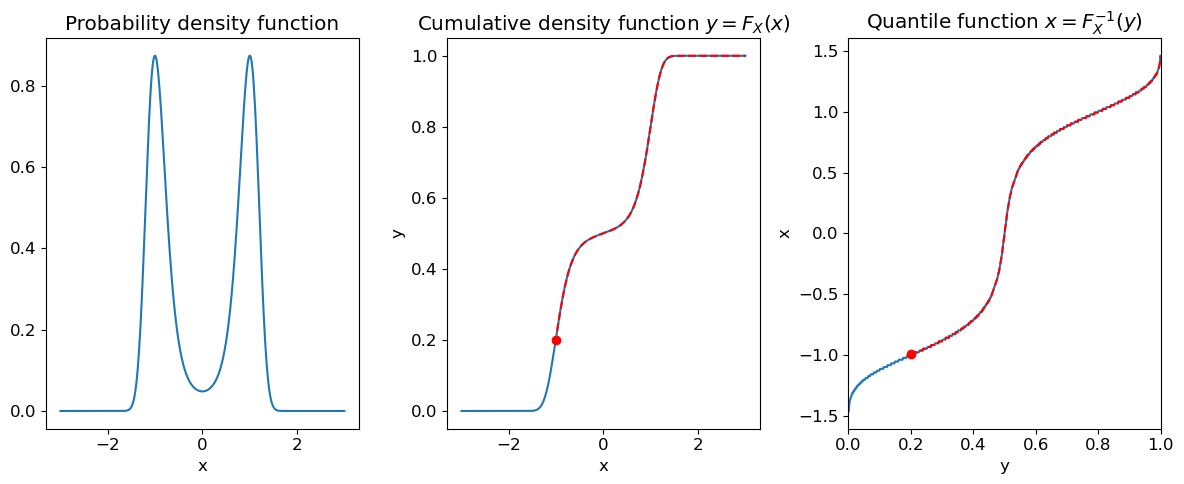

In [4]:
y = 0.2
x = qf(np.array([y]))


fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(12, 5))
ax0.plot(xcenters,pdf(xcenters))
ax0.set_xlabel('x')
ax0.set_title('Probability density function')

ax1.plot(xcenters,cdf(xedges),'-')
ax1.plot(x,y,'ro')
ax1.plot(xcenters[xcenters>x],cdf(xedges)[xcenters>x],'r--')

ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.set_title(r'Cumulative density function $y = F_X(x)$')


ax2.plot(ycenters, qf(ycenters), '-')
ax2.plot(y,x,'ro')
ax2.plot(ycenters[ycenters>y], qf(ycenters)[ycenters>y], 'r--')

ax2.set_xlabel('y')
ax2.set_ylabel('x')

ax2.set_title(r'Quantile function $x = F_X^{-1}(y)$')
ax2.set_xlim((0,1))

plt.tight_layout()

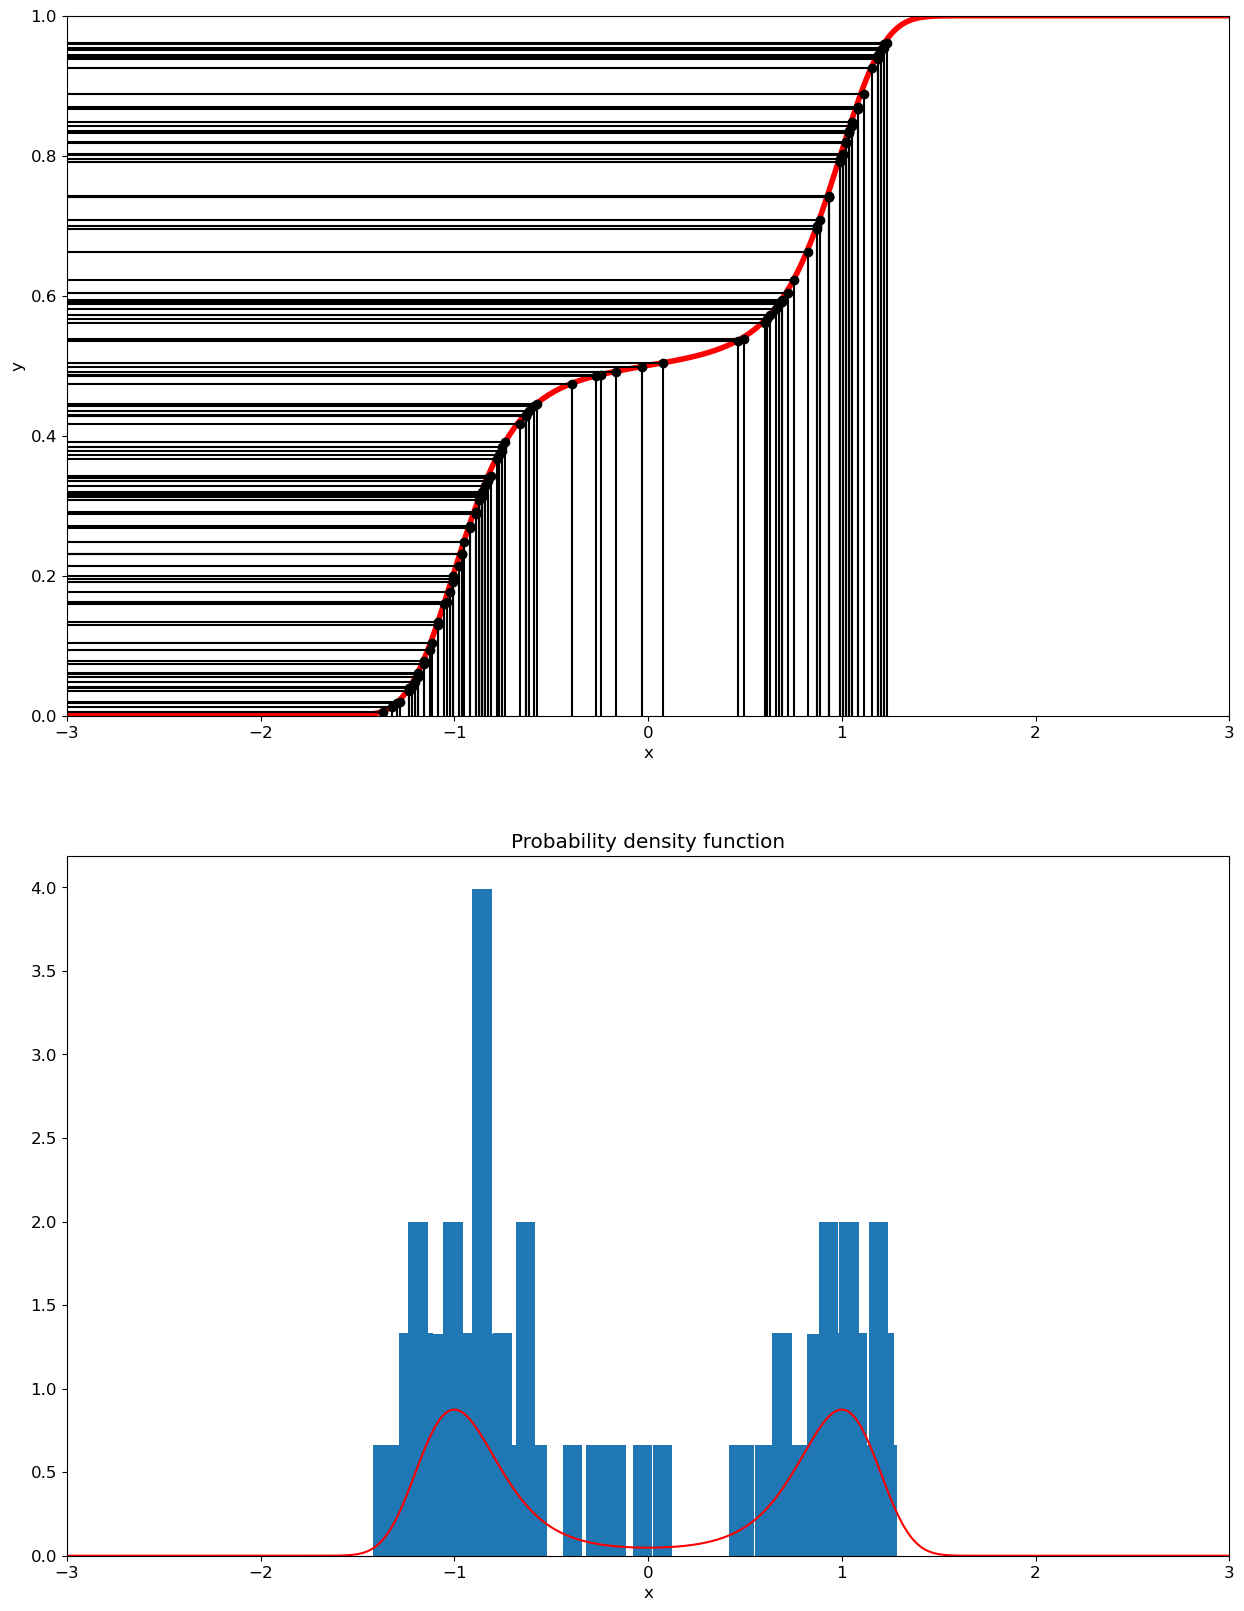

In [11]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15, 20))

N = 100#10 100 1000
y = np.random.uniform(0,1,N)
tol = 1e-2
#y = np.linspace(0+tol, 1-tol, N)
x = qf(y)
h  = np.histogram(x, bins=xedges, density=True)
h0 = h[0]

ax1.plot(xcenters, cdf(xedges),'r-', linewidth =4)
ax1.plot(x, y, 'ko')

ax2.bar(xcenters, h0, width=0.1)
ax2.plot(xcenters, pdf(xcenters), 'r')
ax2.set_xlabel('x')
ax2.set_title('Probability density function')
ax2.set_xlim((xmin, xmax))


for n in range(N):
    
    ax1.plot([xmin, x[n]], [y[n], y[n]], 'k-')
    ax1.plot([x[n], x[n]], [0, y[n]], 'k-')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_ylim((0,1))
    ax1.set_xlim((xmin, xmax))

